In [1]:
import pandas
import numpy
from matplotlib import pyplot


In [32]:
dataset=pandas.read_csv("C:/Users/admin/Desktop/ml/dataset/TSLA--1y.csv")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [36]:
dataset.shape

(2525, 7)

In [37]:
traing_dataset=dataset.iloc[:2000,1:2].values
testing_dataset=dataset.iloc[2000:,1:2].values

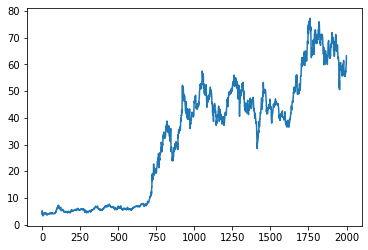

In [38]:
pyplot.plot(traing_dataset)
pyplot.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler(feature_range=(1,2))
train=minmax.fit_transform(traing_dataset)
x_train=[]
y_train=[]
for i in range(60,2000):
    x_train.append(train[i-60:i,0])
    y_train.append(train[i,0])
x_train=numpy.array(x_train)
y_train=numpy.array(y_train)

x_train=numpy.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1940, 60, 1)

In [40]:
x_train.shape[1]

60

In [41]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout


In [42]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [43]:
model.compile(optimizer='adam',loss="mean_squared_error")
model.fit(x_train,y_train,batch_size=100,epochs=8)

Epoch 1/8
20/20 [==============================] - 16s 367ms/step - loss: 0.8670
Epoch 2/8
20/20 [==============================] - 7s 367ms/step - loss: 0.0970
Epoch 3/8
20/20 [==============================] - 8s 374ms/step - loss: 0.0450
Epoch 4/8
20/20 [==============================] - 11s 535ms/step - loss: 0.0313
Epoch 5/8
20/20 [==============================] - 7s 333ms/step - loss: 0.0237
Epoch 6/8
20/20 [==============================] - 8s 385ms/step - loss: 0.0253
Epoch 7/8
20/20 [==============================] - 8s 385ms/step - loss: 0.0209
Epoch 8/8
20/20 [==============================] - 8s 391ms/step - loss: 0.0206


In [44]:
new_data=dataset.iloc[:,1:2].values
test_data=minmax.transform(testing_dataset)
test_data.shape

(525, 1)

In [45]:
x_test=[]
for i in range(60,525):
    x_test.append(test_data[i-60:i,0])

x_test=numpy.array(x_test)
x_test=numpy.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [46]:
pre=model.predict(x_test)

In [47]:
pre_or=minmax.inverse_transform(pre)

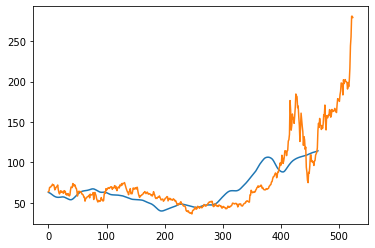

In [50]:
pyplot.plot(pre_or)
pyplot.plot(testing_dataset)
pyplot.show()